In [1]:
import math

def igic(x: float, licphi: float, exphi: float):
    if licphi < 1.0e-7:
        return 2*math.fabs(math.cos(exphi*math.pi))
    if x < 1.0e-7:
        return 0
    else:
        tmp1 = 2*(x - exphi * math.pi)/(licphi * math.pi)
        tmp2 = (tmp1**2) * (1/(math.tan(x)**2))
        tmp3 = 4 * math.cos(x)**2 - tmp2
        if tmp3 < 0:
            return 0
        else:
            return math.sqrt(tmp3)

def igic_max(licphi: float, exphi: float, accuracy: int = 1000):
    max = 0
    for i in range(1,accuracy):
        x = (i/accuracy)*math.pi *2
        val = igic(x, licphi, exphi)
        if val > max:
            max = val
    return max

0
10
20
30
40
50
60
70
80
90


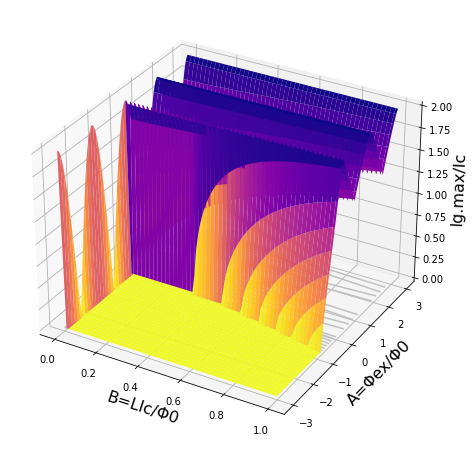

In [3]:
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d    # <- 明示的には使わないが、インポートしておく必要がある。
from matplotlib.animation import FuncAnimation


# Figureと3DAxeS
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("B=LIc/Φ0", size = 16)
ax.set_ylabel("A=Φex/Φ0", size = 16)
ax.set_zlabel("Ig.max/Ic", size = 16)

licp_ax=100
ex_ax=200

# (x,y)データを作成
x = np.linspace(0, 1, licp_ax)
y = np.linspace(-3, 3, ex_ax)

# 格子点を作成
X, Y = np.meshgrid(x, y)

# X, Y は逆向き
Z = np.empty([ex_ax, licp_ax], dtype=float)


for _x in range(licp_ax):
    licp = _x/licp_ax
    if _x%10==0:
        print(_x)
    for _y in range(ex_ax):
        ex = (_y-100)/50
        Z[_y][_x] = igic_max(licp,ex)

# 曲面を描画
ax.plot_surface(X, Y, Z, cmap = "plasma_r")

# 底面に等高線を描画
ax.contour(X, Y, Z, colors = "silver", offset = 0)

plt.show()